<a href="https://colab.research.google.com/github/naidu199/Machine_Learn/blob/main/Multiple_Diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv("/content/drive/MyDrive/Data Sets/Blood_samples_dataset_balanced_2(f).csv")


In [4]:
data.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


In [3]:
data['Disease'].unique()

array(['Healthy', 'Diabetes', 'Thalasse', 'Anemia', 'Thromboc'],
      dtype=object)

In [7]:
column_names = data.columns.tolist()
column_names

['Glucose',
 'Cholesterol',
 'Hemoglobin',
 'Platelets',
 'White Blood Cells',
 'Red Blood Cells',
 'Hematocrit',
 'Mean Corpuscular Volume',
 'Mean Corpuscular Hemoglobin',
 'Mean Corpuscular Hemoglobin Concentration',
 'Insulin',
 'BMI',
 'Systolic Blood Pressure',
 'Diastolic Blood Pressure',
 'Triglycerides',
 'HbA1c',
 'LDL Cholesterol',
 'HDL Cholesterol',
 'ALT',
 'AST',
 'Heart Rate',
 'Creatinine',
 'Troponin',
 'C-reactive Protein',
 'Disease']

In [10]:
data.isna().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

In [26]:
data.Disease

0        Healthy
1       Diabetes
2       Thalasse
3         Anemia
4       Thalasse
          ...   
2346    Diabetes
2347    Thalasse
2348      Anemia
2349    Diabetes
2350      Anemia
Name: Disease, Length: 2351, dtype: object

In [11]:
data.Disease.value_counts()

Anemia      623
Healthy     556
Diabetes    540
Thalasse    509
Thromboc    123
Name: Disease, dtype: int64

In [27]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['Labels']=encoder.fit_transform(data['Disease'])
print(data['Labels'].value_counts())

0    623
2    556
1    540
3    509
4    123
Name: Labels, dtype: int64


In [30]:
X = data.drop(["Disease","Labels"], axis=1)
Y = data.Labels

In [31]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,random_state=41,test_size=0.28)

Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
ypred1=model1.predict(xtest)

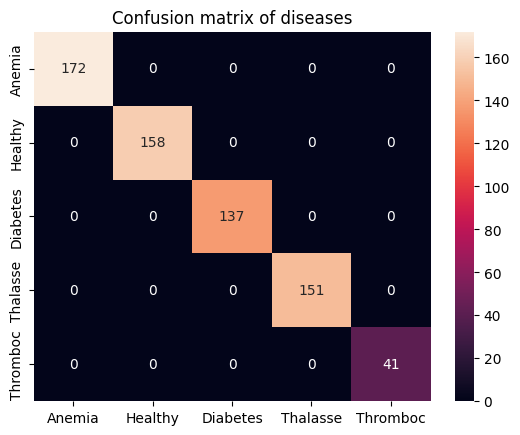

In [41]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(ytest,ypred1)
cmdf=pd.DataFrame(cm,index=["Anemia","Healthy","Diabetes","Thalasse","Thromboc"], columns=["Anemia","Healthy","Diabetes","Thalasse","Thromboc"])
# cmdf = cmdf.astype(int)
sns.heatmap(cmdf, annot=True, fmt='d')
plt.title("Confusion matrix of diseases")
plt.show()

In [36]:
print(classification_report(ytest,ypred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       172
           1       1.00      1.00      1.00       158
           2       1.00      1.00      1.00       137
           3       1.00      1.00      1.00       151
           4       1.00      1.00      1.00        41

    accuracy                           1.00       659
   macro avg       1.00      1.00      1.00       659
weighted avg       1.00      1.00      1.00       659



Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier